In [654]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error


from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [204]:
pd.set_option('display.max_column' , None)
warnings.simplefilter(action='ignore',category=Warning)
pd.options.display.float_format = '{:,.3f}'.format

In [6]:
df = pd.read_csv("../../datasets/uygulama/train.csv")

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [12]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis=1)

In [17]:
df["MSZoning"].dtype

dtype('O')

In [18]:
df["BldgType"].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [265]:
def grab_col_names(data_frame, cat_th=25 , car_th=30): 
    cat_cols = [col for col in data_frame.columns if data_frame[col].dtype == "O"]
    num_but_cat = [col for col in data_frame.columns if data_frame[col].nunique() < car_th and data_frame[col].dtype != "O"]
    cat_but_car = [col for col in data_frame.columns if data_frame[col].nunique() > car_th and data_frame[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in data_frame.columns if data_frame[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {data_frame.shape[0]}")
    print(f"Variables: {data_frame.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"num_but_car: {len(num_but_cat)}")
    return num_cols,cat_cols,cat_but_car

In [48]:
num_cols, cat_cols, cat_but_car = grab_col_names(df)

Observations: 1460
Variables: 81
cat_cols: 61
cat_but_car: 0
num_cols: 20
num_but_car: 18


In [268]:
for col in df.columns:
    count = df[col].nunique()
    type = df[col].dtype
    print("###########################")
    print({col: count })
    print(type)
    

###########################
{'MSSubClass': 15}
int64
###########################
{'MSZoning': 5}
object
###########################
{'LotFrontage': 110}
float64
###########################
{'LotArea': 1073}
int64
###########################
{'Street': 2}
object
###########################
{'Alley': 2}
object
###########################
{'LotShape': 4}
object
###########################
{'LandContour': 4}
object
###########################
{'Utilities': 2}
object
###########################
{'LotConfig': 5}
object
###########################
{'LandSlope': 3}
object
###########################
{'Neighborhood': 25}
object
###########################
{'Condition1': 9}
object
###########################
{'Condition2': 8}
object
###########################
{'BldgType': 5}
object
###########################
{'HouseStyle': 8}
object
###########################
{'OverallQual': 10}
int64
###########################
{'OverallCond': 9}
int64
###########################
{'YearBuilt': 112}
int64
###

In [46]:
df["3SsnPorch"].unique()

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304], dtype=int64)

In [50]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [72]:
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [74]:
correlations = df[num_cols].corr()

In [75]:
correlations

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.402797,0.070250,0.344997,0.088521,0.151972,0.010700,0.041383,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,-0.024947,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,0.199010,0.825667,0.478954,0.224880,0.188686,-0.387268,-0.050364,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,0.287389,0.642277,0.371600,0.205726,0.226298,-0.193919,-0.038740,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,0.390857,0.252691,0.373066,0.159718,0.125703,-0.110204,0.061466,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.153484,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.088011,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.190708,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.322445,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.233449,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852


In [63]:
high = [col for col in correlations.columns if correlations.loc['SalePrice', col] > 0.5]
high

['YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'SalePrice']

In [65]:
df["BsmtFinSF2"].value_counts()

BsmtFinSF2
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: count, Length: 144, dtype: int64

In [67]:
df.drop(["Id"], axis=1, inplace=True)

In [68]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
for col in cat_cols:
    out = df.groupby(col).agg({"SalePrice":"mean"}).sort_values(by="SalePrice", ascending=False)
    print("##################################")
    print(out)  

##################################
            SalePrice
MSZoning             
FV       $214,014.062
RL       $191,004.995
RH       $131,558.375
RM       $126,316.830
C (all)   $74,528.000
##################################
          SalePrice
Street             
Pave   $181,130.539
Grvl   $130,190.500
##################################
         SalePrice
Alley             
Pave  $168,000.585
Grvl  $122,219.080
##################################
            SalePrice
LotShape             
IR2      $239,833.366
IR3      $216,036.500
IR1      $206,101.665
Reg      $164,754.818
##################################
               SalePrice
LandContour             
HLS         $231,533.940
Low         $203,661.111
Lvl         $180,183.747
Bnk         $143,104.079
##################################
             SalePrice
Utilities             
AllPub    $180,950.957
NoSeWa    $137,500.000
##################################
             SalePrice
LotConfig             
CulDSac   $223,854.617
FR

In [87]:
df["Street"].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

<Axes: >

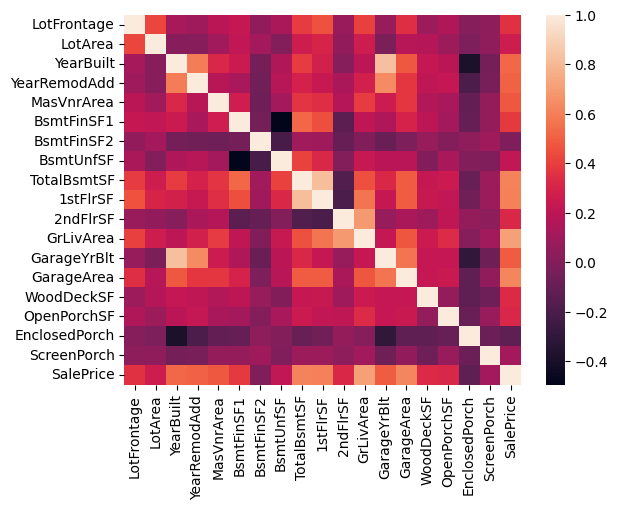

In [88]:
sns.heatmap(correlations)

In [135]:
def locate_uneven_cols(dataframe, col):
    total_values = dataframe[col].value_counts().sum()
    val_counts = dataframe[col].value_counts() 
    for count in val_counts:
        percentage = (count / total_values) * 100
        if percentage > 95:
            return True
    return False

In [136]:
uneven_cols = []
for col in df.columns:
    bool = locate_uneven_cols(df,col)
    if bool:
        uneven_cols.append(col)

In [137]:
uneven_cols

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 'GarageQual',
 'GarageCond',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [138]:
for col in uneven_cols:
    print("####################")
    print(df[col].value_counts())

####################
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
####################
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
####################
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64
####################
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64
####################
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64
####################
LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: coun

In [170]:
no_effect_col = correlations[correlations["SalePrice"] < 0.2].index
no_effect_col

Index(['BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch'], dtype='object')

In [171]:
dff = df.drop(uneven_cols, axis=1)

In [172]:
dff.shape

(1460, 68)

In [173]:
dff = dff.drop(no_effect_col,axis=1)
dff.shape

(1460, 65)

In [174]:
correlations = df[num_cols].corr()

<Axes: >

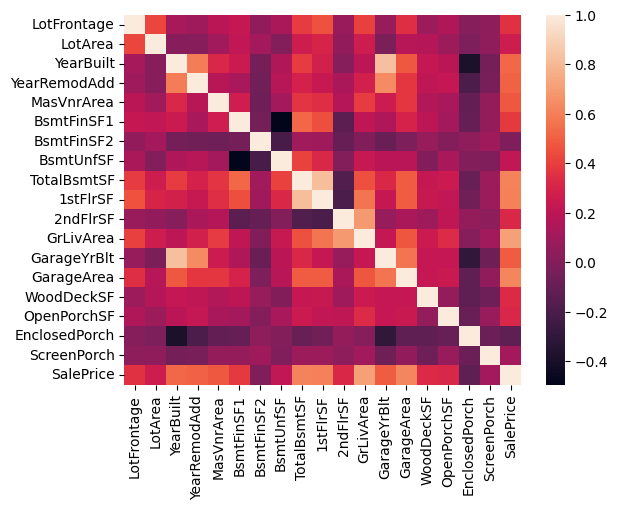

In [175]:
sns.heatmap(correlations)

In [191]:
highly_correlated_pairs = []

for col1 in correlations.columns:
    for col2 in correlations.columns:
        # Check if the absolute correlation exceeds the threshold and col1 is not col2
        if abs(correlations.at[col1, col2]) >= 0.7 and col1 != col2:
            highly_correlated_pairs.append((col1, col2))

# To remove duplicates (since correlation is symmetric), convert to set and back to list
unique_pairs = list(set(tuple(sorted(pair)) for pair in highly_correlated_pairs))

print(unique_pairs)

[('GarageYrBlt', 'YearBuilt'), ('GrLivArea', 'SalePrice'), ('1stFlrSF', 'TotalBsmtSF')]


In [205]:
correlations[highly_correlated].T

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
YearBuilt,0.123,0.014,1.000,0.593,0.316,0.250,-0.049,0.149,0.391,0.282,0.010,0.199,0.826,0.479,0.225,0.189,-0.387,-0.050,0.523
TotalBsmtSF,0.392,0.261,0.391,0.291,0.364,0.522,0.105,0.415,1.000,0.820,-0.175,0.455,0.322,0.487,0.232,0.247,-0.095,0.084,0.614
1stFlrSF,0.457,0.299,0.282,0.240,0.345,0.446,0.097,0.318,0.820,1.000,-0.203,0.566,0.233,0.490,0.235,0.212,-0.065,0.089,0.606
GrLivArea,0.403,0.263,0.199,0.287,0.391,0.208,-0.010,0.240,0.455,0.566,0.688,1.000,0.231,0.469,0.247,0.330,0.009,0.102,0.709
GarageYrBlt,0.070,-0.025,0.826,0.642,0.253,0.153,-0.088,0.191,0.322,0.233,0.071,0.231,1.000,0.565,0.225,0.228,-0.297,-0.075,0.486
SalePrice,0.352,0.264,0.523,0.507,0.477,0.386,-0.011,0.214,0.614,0.606,0.319,0.709,0.486,0.623,0.324,0.316,-0.129,0.111,1.000


In [198]:
dff.drop(["TotalBsmtSF","GarageYrBlt"],axis=1,inplace=True)

In [201]:
dff.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,$65.000,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,$196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,Y,0,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,$80.000,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,NaN,$0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,TA,6,Typ,1,TA,Attchd,RFn,2,460,Y,298,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,$68.000,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,$162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,Gd,6,Typ,1,TA,Attchd,RFn,2,608,Y,0,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,$60.000,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,NaN,$0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,Y,0,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,$84.000,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,$350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,Gd,9,Typ,1,TA,Attchd,RFn,3,836,Y,192,84,NaN,NaN,NaN,12,2008,WD,Normal,250000


In [202]:
def missing_values_table(data_frame, na_name=False):
    na_columns = [col for col in data_frame.columns if data_frame[col].isnull().sum() > 0]

    n_miss = data_frame[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (data_frame[na_columns].isnull().sum() / data_frame.shape[0] * 100)
    missing_df = pd.concat([n_miss, np.round(ratio,2)],axis=1, keys=["n_miss" , "ratio"])
    print(missing_df,end="\n")

    if na_name:
        return na_columns

In [206]:
missing_values_table(dff)

              n_miss  ratio
PoolQC          1453 99.520
MiscFeature     1406 96.300
Alley           1369 93.770
Fence           1179 80.750
MasVnrType       872 59.730
FireplaceQu      690 47.260
LotFrontage      259 17.740
GarageType        81  5.550
GarageFinish      81  5.550
BsmtExposure      38  2.600
BsmtFinType2      38  2.600
BsmtQual          37  2.530
BsmtCond          37  2.530
BsmtFinType1      37  2.530
MasVnrArea         8  0.550
Electrical         1  0.070


In [213]:
dff.drop(["PoolQC","MiscFeature","Alley"], axis=1, inplace=True)
dff.shape

(1460, 60)

In [214]:
dff["Fence"].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [215]:
dff["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [216]:
dff["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [217]:
dff["Fireplaces"].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [228]:
dff.groupby("FireplaceQu").agg({"SalePrice": ["mean","count"]})

SalePrice      
                   mean count
FireplaceQu                  
Ex          337,712.500    24
Fa          167,298.485    33
Gd          226,351.416   380
Po          129,764.150    20
TA          205,723.489   313

In [219]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,"1,460.000",56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,"1,201.000",70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,"1,460.000","10,516.828","9,981.265","1,300.000","7,553.500","9,478.500","11,601.500","215,245.000"
OverallQual,"1,460.000",6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,"1,460.000",5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,"1,460.000","1,971.268",30.203,"1,872.000","1,954.000","1,973.000","2,000.000","2,010.000"
YearRemodAdd,"1,460.000","1,984.866",20.645,"1,950.000","1,967.000","1,994.000","2,004.000","2,010.000"
MasVnrArea,"1,452.000",103.685,181.066,0.000,0.000,0.000,166.000,"1,600.000"
BsmtFinSF1,"1,460.000",443.640,456.098,0.000,0.000,383.500,712.250,"5,644.000"
BsmtUnfSF,"1,460.000",567.240,441.867,0.000,223.000,477.500,808.000,"2,336.000"


In [222]:
has_fence = dff["Fence"].notnull()
has_fence.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Fence, Length: 1460, dtype: int32

In [223]:
dff["HAS_FENCE"] = has_fence

In [227]:
dff.groupby("HAS_FENCE").agg({"SalePrice": ["mean","count"]})

SalePrice      
                 mean count
HAS_FENCE                  
False     187,596.838  1179
True      152,912.007   281

In [229]:
dff.groupby("Fireplaces").agg({"SalePrice": ["mean","count"]})

SalePrice      
                  mean count
Fireplaces                  
0          141,331.483   690
1          211,843.909   650
2          240,588.539   115
3          252,000.000     5

In [242]:
df.groupby("MasVnrType").agg({"SalePrice": ["mean","count"]})


SalePrice      
                  mean count
MasVnrType                  
BrkCmn     146,318.067    15
BrkFace    204,691.872   445
Stone      265,583.625   128

In [237]:
fire = dff.loc[(dff["Fireplaces"] > 0) & (dff["FireplaceQu"] == "Ex")]
fire

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HAS_FENCE
46,50,RL,48.000,12822,IR1,Lvl,CulDSac,Gtl,Mitchel,Norm,1Fam,1.5Fin,7,5,2003,2003,Gable,VinylSd,VinylSd,NaN,0.000,Gd,TA,PConc,Ex,TA,No,GLQ,1351,Unf,83,Ex,Y,SBrkr,1518,631,2149,1,0,1,1,1,Gd,6,Typ,1,Ex,Attchd,RFn,2,670,Y,168,43,NaN,8,2009,WD,Abnorml,239686,False
197,75,RL,174.000,25419,Reg,Lvl,Corner,Gtl,NAmes,Artery,1Fam,2Story,8,4,1918,1990,Gable,Stucco,Stucco,NaN,0.000,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,140,Gd,Y,SBrkr,1360,1360,3112,1,1,2,0,4,Gd,8,Typ,1,Ex,Detchd,Unf,2,795,Y,0,16,GdPrv,3,2006,WD,Abnorml,235000,True
224,20,RL,103.000,13472,Reg,Lvl,Inside,Gtl,NridgHt,Norm,1Fam,1Story,10,5,2003,2003,Hip,VinylSd,VinylSd,BrkFace,922.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,2336,Ex,Y,SBrkr,2392,0,2392,0,0,2,0,3,Ex,8,Typ,1,Ex,Attchd,Fin,3,968,Y,248,105,NaN,6,2009,WD,Normal,386250,False
278,20,RL,107.000,14450,Reg,Lvl,Inside,Gtl,NridgHt,Norm,1Fam,1Story,9,5,2006,2007,Gable,CemntBd,CmentBd,BrkFace,315.000,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,2121,Ex,Y,SBrkr,2121,0,2121,0,0,2,1,3,Ex,8,Typ,1,Ex,Attchd,Fin,3,732,Y,124,98,NaN,5,2007,New,Partial,415298,False
304,75,RM,87.000,18386,Reg,Lvl,Inside,Gtl,OldTown,Norm,1Fam,2.5Fin,7,9,1880,2002,Gable,CemntBd,CmentBd,NaN,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,1470,Ex,Y,SBrkr,1675,1818,3493,0,0,3,0,3,Gd,10,Typ,1,Ex,Attchd,Unf,3,870,Y,302,0,NaN,5,2008,WD,Normal,295000,False
309,20,RL,90.000,12378,IR1,Lvl,Inside,Gtl,NridgHt,Norm,1Fam,1Story,9,5,2003,2004,Gable,VinylSd,VinylSd,NaN,0.000,Gd,TA,PConc,Ex,TA,Gd,GLQ,1274,Unf,622,Ex,Y,SBrkr,1944,0,1944,1,0,2,0,3,Ex,8,Typ,3,Ex,Attchd,Fin,3,708,Y,208,175,NaN,11,2006,WD,Normal,360000,False
343,120,RL,63.000,8849,IR1,Lvl,Inside,Gtl,NridgHt,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,MetalSd,MetalSd,BrkFace,616.000,Ex,TA,PConc,Ex,TA,No,GLQ,28,Unf,1656,Ex,Y,SBrkr,1684,0,1684,0,0,2,0,2,Ex,6,Typ,1,Ex,Attchd,RFn,2,564,Y,495,72,NaN,7,2008,WD,Normal,266000,False
349,60,RL,56.000,20431,IR2,Lvl,Inside,Gtl,NridgHt,Norm,1Fam,2Story,9,5,2005,2006,Hip,CemntBd,CmentBd,BrkFace,870.000,Ex,TA,PConc,Ex,TA,No,GLQ,1410,Unf,438,Ex,Y,SBrkr,1848,880,2728,1,0,2,1,4,Ex,10,Typ,2,Ex,Attchd,Fin,3,706,Y,0,0,NaN,4,2006,New,Partial,437154,False
362,85,RL,64.000,7301,Reg,Lvl,Corner,Gtl,Edwards,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,HdBoard,HdBoard,BrkFace,500.000,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,Ex,Y,SBrkr,495,1427,1922,0,0,3,0,4,Gd,7,Typ,1,Ex,BuiltIn,RFn,2,672,Y,0,0,NaN,7,2009,ConLD,Normal,198500,False
378,20,RL,88.000,11394,Reg,Lvl,Corner,Gtl,StoneBr,Norm,1Fam,1Story,9,2,2010,2010,Hip,VinylSd,VinylSd,Stone,350.000,Gd,TA,PConc,Ex,TA,Av,GLQ,1445,Unf,411,Ex,Y,SBrkr,1856,0,1856,1,0,1,1,1,Ex,8,Typ,1,Ex,Attchd,Fin,3,834,Y,113,0,NaN,6,2010,New,Partial,394432,False


In [239]:
dff.drop(["HAS_FENCE", "Fence", "FireplaceQu","MasVnrType"], axis=1, inplace=True)

In [240]:
dff.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,Gd,8,Typ,0,Attchd,RFn,2,548,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,TA,6,Typ,1,Attchd,RFn,2,460,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,Gd,6,Typ,1,Attchd,RFn,2,608,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,Gd,7,Typ,1,Detchd,Unf,3,642,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,Gd,9,Typ,1,Attchd,RFn,3,836,Y,192,84,12,2008,WD,Normal,250000


In [269]:
num_cols, cat_cols, cat_but_car = grab_col_names(dff)

Observations: 1460
Variables: 57
cat_cols: 43
cat_but_car: 0
num_cols: 14
num_but_car: 13


In [334]:
missing = missing_values_table(dff, True)

              n_miss  ratio
LotFrontage      259 17.740
GarageType        81  5.550
GarageFinish      81  5.550
BsmtExposure      38  2.600
BsmtFinType2      38  2.600
BsmtQual          37  2.530
BsmtCond          37  2.530
BsmtFinType1      37  2.530
MasVnrArea         8  0.550
Electrical         1  0.070


In [275]:
df["LotFrontage"].nunique()

110

In [455]:
df2 = dff.copy()

In [456]:
for col in missing:
    unique = df2[col].nunique()
    dtype = df2[col].dtype
    print(f"{col}: {unique} ,{dtype}")

LotFrontage: 110 ,float64
MasVnrArea: 327 ,float64
BsmtQual: 5 ,object
BsmtCond: 5 ,object
BsmtExposure: 5 ,object
BsmtFinType1: 7 ,object
BsmtFinType2: 7 ,object
Electrical: 6 ,object
GarageType: 7 ,object
GarageFinish: 4 ,object


In [309]:
dff.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,Gd,8,Typ,0,Attchd,RFn,2,548,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,TA,6,Typ,1,Attchd,RFn,2,460,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,Gd,6,Typ,1,Attchd,RFn,2,608,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,Gd,7,Typ,1,Detchd,Unf,3,642,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,Gd,9,Typ,1,Attchd,RFn,3,836,Y,192,84,12,2008,WD,Normal,250000


In [316]:
df2[df2["LotFrontage"].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,IR1,Lvl,Corner,Gtl,NWAmes,PosN,1Fam,2Story,7,6,1973,1973,Gable,HdBoard,HdBoard,240.000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,216,Ex,Y,SBrkr,1107,983,2090,1,0,2,1,3,TA,7,Typ,2,Attchd,RFn,2,484,Y,235,204,11,2009,WD,Normal,200000
12,20,RL,NaN,12968,IR2,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,1Story,5,6,1962,1962,Hip,HdBoard,Plywood,0.000,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,175,TA,Y,SBrkr,912,0,912,1,0,1,0,2,TA,4,Typ,0,Detchd,Unf,1,352,Y,140,0,9,2008,WD,Normal,144000
14,20,RL,NaN,10920,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,6,5,1960,1960,Hip,MetalSd,MetalSd,212.000,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,520,TA,Y,SBrkr,1253,0,1253,1,0,1,1,2,TA,5,Typ,1,Attchd,RFn,1,352,Y,0,213,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,1Fam,1Story,6,7,1970,1970,Gable,Wd Sdng,Wd Sdng,180.000,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,426,Ex,Y,SBrkr,1004,0,1004,1,0,1,0,2,TA,5,Typ,1,Attchd,Fin,2,480,Y,0,0,3,2010,WD,Normal,149000
24,20,RL,NaN,8246,IR1,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,1Story,5,8,1968,2001,Gable,Plywood,Plywood,0.000,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,204,Ex,Y,SBrkr,1060,0,1060,1,0,1,0,3,Gd,6,Typ,1,Attchd,Unf,1,270,Y,406,90,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,RL,NaN,12546,IR1,Lvl,Corner,Gtl,NWAmes,Norm,1Fam,1Story,6,7,1981,1981,Gable,MetalSd,MetalSd,310.000,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,762,Ex,Y,SBrkr,1440,0,1440,0,0,2,0,3,Gd,7,Typ,1,Attchd,Fin,2,467,Y,0,0,4,2007,WD,Normal,182900
1431,120,RL,NaN,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,Plywood,Plywood,0.000,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,TA,Y,SBrkr,958,0,958,0,0,2,0,2,TA,5,Typ,0,Attchd,RFn,2,440,Y,0,60,10,2009,WD,Normal,143750
1441,120,RM,NaN,4426,Reg,Lvl,Inside,Gtl,CollgCr,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,VinylSd,VinylSd,147.000,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,151,Ex,Y,SBrkr,848,0,848,1,0,1,0,1,Gd,3,Typ,1,Attchd,RFn,2,420,Y,149,0,5,2008,WD,Normal,149300
1443,30,RL,NaN,8854,Reg,Lvl,Inside,Gtl,BrkSide,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,Wd Sdng,Wd Sdng,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,952,Fa,N,FuseF,952,0,952,0,0,1,0,2,Fa,4,Typ,1,Detchd,Unf,1,192,P,0,98,5,2009,WD,Normal,121000


In [326]:
unique_arr = []
for col in df2.columns:
    if df[col].dtype == 'O':
        unique_arr.append(df2[col].unique()) 

In [335]:
for col in missing:
    type = df2[col].dtype
    if type == "O":
        df2[col] = df2[col].fillna(f"{col}_missing")

In [457]:
missing_values_table(df2)

             n_miss  ratio
LotFrontage     259 17.740
MasVnrArea        8  0.550


In [337]:
df2["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'GarageType_missing',
       'Basment', '2Types'], dtype=object)

In [340]:
df2[df2["Electrical"] == "Electrical_missing"]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.000,9735,Reg,Lvl,Inside,Gtl,Timber,Norm,1Fam,SLvl,5,5,2006,2007,Gable,VinylSd,VinylSd,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,384,Gd,Y,Electrical_missing,754,640,1394,0,0,2,1,3,Gd,7,Typ,0,BuiltIn,Fin,2,400,Y,100,0,5,2008,WD,Normal,167500


In [458]:
df2 = df2.drop(index=1379)

In [367]:
def check_outliers(data_frame, col_name):
    up_limit,low_limit = outliers_treshold(data_frame,col_name)
    if data_frame[(data_frame[col_name] > up_limit) | (data_frame[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def outliers_treshold(data_frame, col_name, q1=0.25 ,q3=0.75):
    quartile1 = data_frame[col_name].quantile(q1)
    quartile3 = data_frame[col_name].quantile(q3)
    interquartile_range = quartile3-quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return up_limit, low_limit

def grab_outliers(data_frame,col_name,index=False):
    up,low = outliers_treshold(data_frame,col_name)
    # if data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].shape[0] > 10:
    #     print(data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].head())
    # else:
    #     print(data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))])
    if index:
        outlier_index = data_frame[((data_frame[col_name] < low) | (data_frame[col_name] > up))].index
        return outlier_index

In [459]:
num_cols,cat_cols,cat_but_car = grab_col_names(df2)

Observations: 1459
Variables: 57
cat_cols: 43
cat_but_car: 0
num_cols: 14
num_but_car: 13


In [368]:
outliers = []
for col in num_cols:
    if check_outliers(df2,col):
        outliers.append(col)
        print(col)
        index = grab_outliers(df2,col,True)
        print(len(index))

LotFrontage
88
LotArea
68
YearBuilt
7
MasVnrArea
96
BsmtFinSF1
7
BsmtUnfSF
29
1stFlrSF
20
2ndFlrSF
2
GrLivArea
31
GarageArea
21
WoodDeckSF
32
OpenPorchSF
77
SalePrice
61


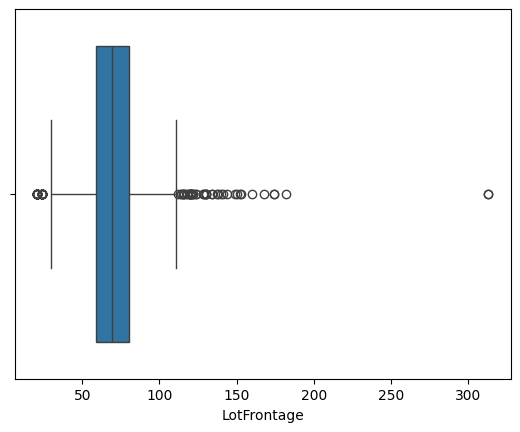

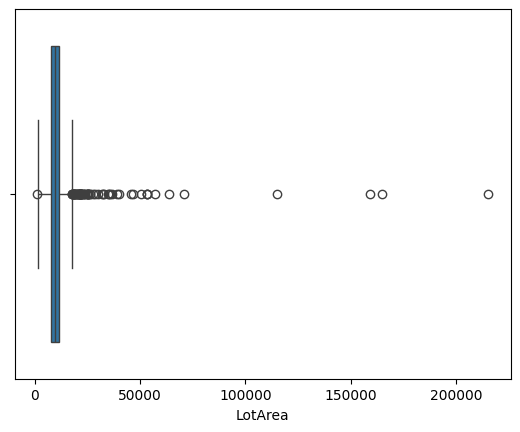

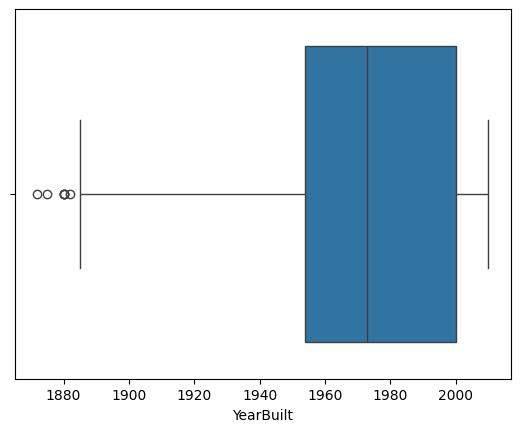

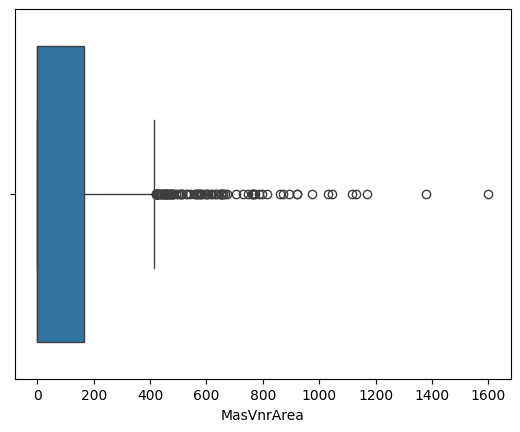

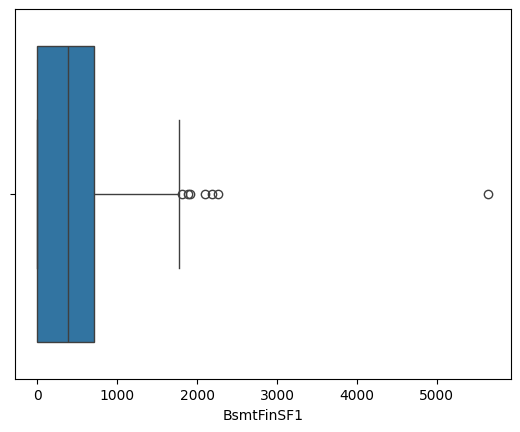

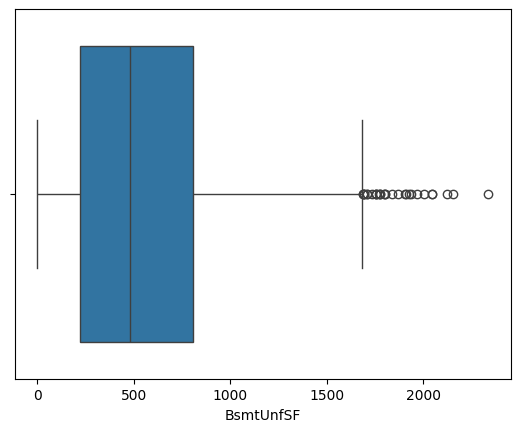

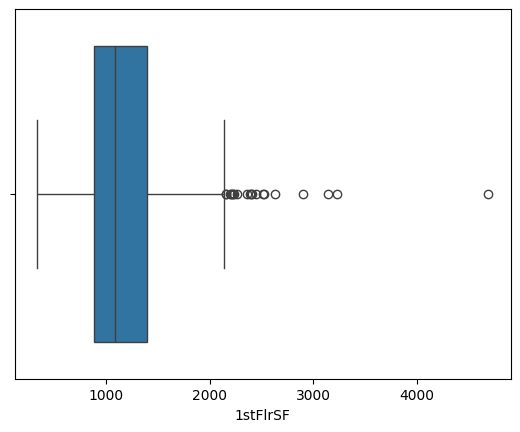

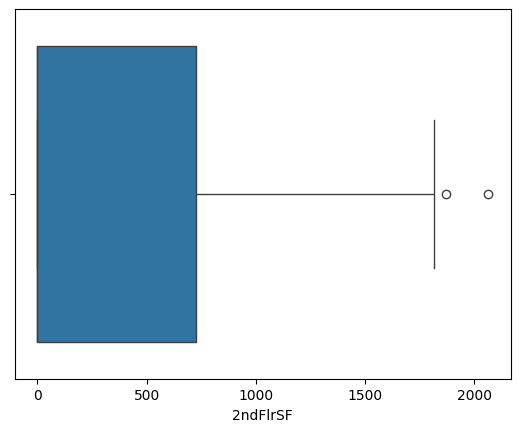

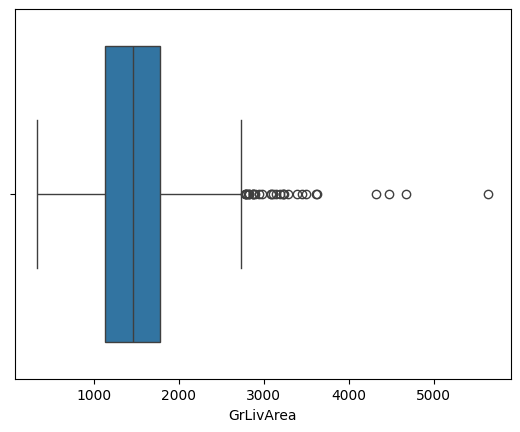

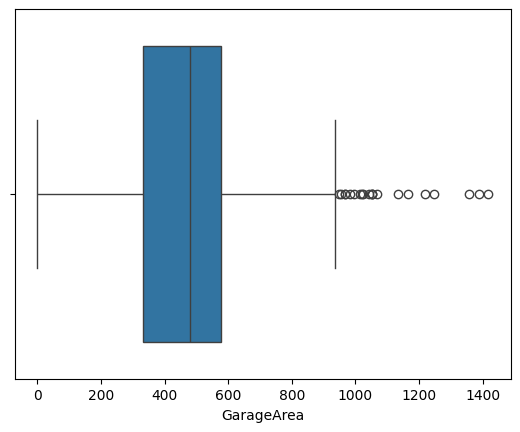

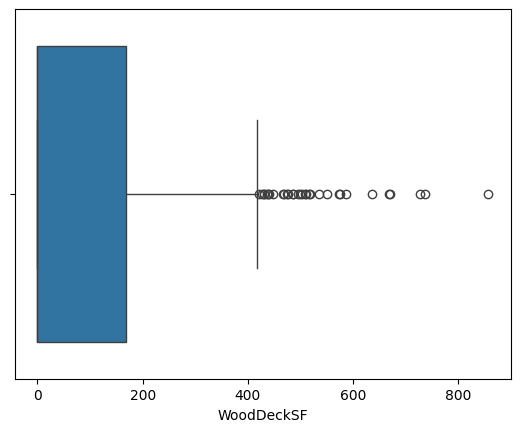

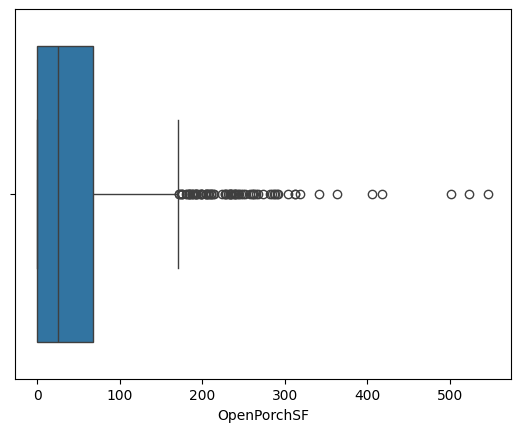

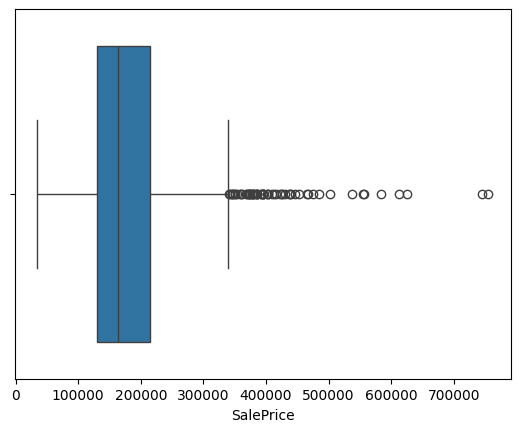

In [364]:
for col in outliers:
    sns.boxplot(x=df2[col])
    plt.show()

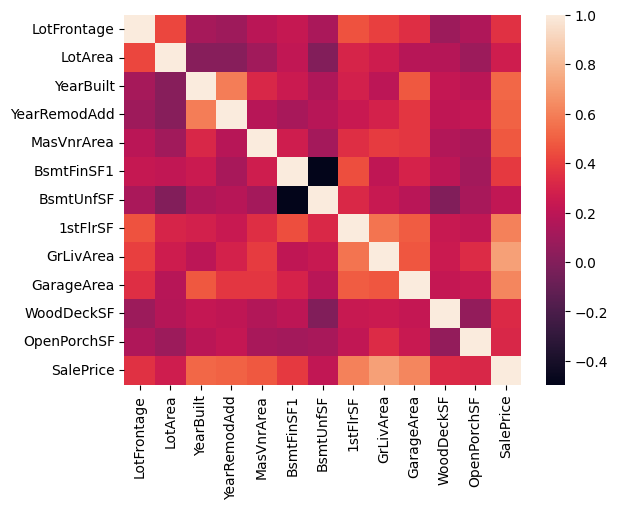

In [484]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df3[num_cols].corr()
sns.heatmap(corr_matrix)
plt.show()

# Remove highly correlated features


In [481]:
df2.drop("2ndFlrSF",inplace=True,axis=1)

KeyError: "['2ndFlrSF'] not found in axis"

In [461]:
num_cols = [col for col in num_cols if "BsmtUnfSF" not in col]

In [462]:
corr_matrix

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,BsmtUnfSF
LotFrontage,1.000,0.426,0.123,0.089,0.194,0.234,0.457,0.080,0.403,0.345,0.089,0.152,0.352,0.133
LotArea,0.426,1.000,0.014,0.014,0.104,0.214,0.300,0.051,0.263,0.180,0.172,0.085,0.264,-0.003
YearBuilt,0.123,0.014,1.000,0.593,0.316,0.250,0.283,0.010,0.199,0.479,0.225,0.189,0.523,0.149
YearRemodAdd,0.089,0.014,0.593,1.000,0.180,0.129,0.241,0.140,0.288,0.372,0.206,0.227,0.507,0.182
MasVnrArea,0.194,0.104,0.316,0.180,1.000,0.264,0.344,0.175,0.391,0.373,0.160,0.125,0.477,0.114
BsmtFinSF1,0.234,0.214,0.250,0.129,0.264,1.000,0.445,-0.137,0.208,0.297,0.204,0.111,0.386,-0.496
1stFlrSF,0.457,0.300,0.283,0.241,0.344,0.445,1.000,-0.202,0.566,0.490,0.236,0.211,0.606,0.318
2ndFlrSF,0.080,0.051,0.010,0.140,0.175,-0.137,-0.202,1.000,0.688,0.139,0.092,0.208,0.319,0.005
GrLivArea,0.403,0.263,0.199,0.288,0.391,0.208,0.566,0.688,1.000,0.469,0.247,0.330,0.709,0.240
GarageArea,0.345,0.180,0.479,0.372,0.373,0.297,0.490,0.139,0.469,1.000,0.225,0.241,0.623,0.183


In [463]:
df2["BsmtUnfSF"] = dff["BsmtUnfSF"]

In [464]:
df["YearRemodAdd"].nunique()

61

In [390]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtUnfSF
0,60,RL,65.000,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,Ex,Y,SBrkr,856,1710,1,0,2,1,3,Gd,8,Typ,0,Attchd,RFn,2,548,Y,0,61,2,2008,WD,Normal,208500,150
1,20,RL,80.000,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,Ex,Y,SBrkr,1262,1262,0,1,2,0,3,TA,6,Typ,1,Attchd,RFn,2,460,Y,298,0,5,2007,WD,Normal,181500,284
2,60,RL,68.000,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,Ex,Y,SBrkr,920,1786,1,0,2,1,3,Gd,6,Typ,1,Attchd,RFn,2,608,Y,0,42,9,2008,WD,Normal,223500,434
3,70,RL,60.000,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,Gd,Y,SBrkr,961,1717,1,0,1,0,3,Gd,7,Typ,1,Detchd,Unf,3,642,Y,0,35,2,2006,WD,Abnorml,140000,540
4,60,RL,84.000,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,Ex,Y,SBrkr,1145,2198,1,0,2,1,4,Gd,9,Typ,1,Attchd,RFn,3,836,Y,192,84,12,2008,WD,Normal,250000,490


In [398]:
for col in cat_cols:
    type = df2[col].dtype
    uniq = df2[col].nunique()
    print("########################")
    print(f"{col}: {type}, {uniq}")

########################
MSZoning: object, 5
########################
LotShape: object, 4
########################
LandContour: object, 4
########################
LotConfig: object, 5
########################
LandSlope: object, 3
########################
Neighborhood: object, 25
########################
Condition1: object, 9
########################
BldgType: object, 5
########################
HouseStyle: object, 8
########################
RoofStyle: object, 6
########################
Exterior1st: object, 15
########################
Exterior2nd: object, 16
########################
ExterQual: object, 4
########################
ExterCond: object, 5
########################
Foundation: object, 6
########################
BsmtQual: object, 5
########################
BsmtCond: object, 5
########################
BsmtExposure: object, 5
########################
BsmtFinType1: object, 7
########################
BsmtFinType2: object, 7
########################
HeatingQC: object, 5
###############

In [393]:
grab_col_names(df2)

Observations: 1459
Variables: 56
cat_cols: 43
cat_but_car: 0
num_cols: 13
num_but_car: 13


(['LotFrontage',
  'LotArea',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  '1stFlrSF',
  'GrLivArea',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'SalePrice',
  'BsmtUnfSF'],
 ['MSZoning',
  'LotShape',
  'LandContour',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'Exterior1st',
  'Exterior2nd',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'GarageType',
  'GarageFinish',
  'PavedDrive',
  'SaleType',
  'SaleCondition',
  'MSSubClass',
  'OverallQual',
  'OverallCond',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'MoSold',
  'YrSold'],
 [])

In [475]:
label_encode_cols = []
ohe_cols = []
for col in cat_cols:
    if df2[col].nunique() > 4:
        label_encode_cols.append(col)
    else:
        ohe_cols.append(col)

In [476]:
label_encode_cols

['MSZoning',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'Functional',
 'GarageType',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageCars',
 'MoSold',
 'YrSold']

In [477]:
ohe_cols

['LotShape',
 'LandContour',
 'LandSlope',
 'ExterQual',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'PavedDrive',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'Fireplaces']

In [403]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

In [404]:
df_encoded = label_encoder.fit_transform(label_encode_cols)

In [408]:
def label_encode(le, df, col_set, out=False):
    df[col] = le.fit_transform(df[col])
    if out:
        print(f"{col} label encoded")

In [422]:
def one_hot_encode(data_frame, categorical_cols, drop_first=True):
    data_frame = pd.get_dummies(data_frame, columns=categorical_cols,drop_first=drop_first)
    return data_frame

In [465]:
df3 = df2.copy()

In [467]:
label_encode(label_encoder,df3,"MSZoning",True)

MSZoning label encoded


In [468]:
df3["MSZoning"].unique()

array([3, 4, 0, 1, 2])

In [469]:
df3 = one_hot_encode(df3,ohe_cols,True)

In [428]:
label_encode_cols = [col for col in label_encode_cols if "MSZoning" not in col]

In [466]:
for col in label_encode_cols:
    label_encode(label_encoder,df3,col,True)

LotConfig label encoded
Neighborhood label encoded
Condition1 label encoded
BldgType label encoded
HouseStyle label encoded
RoofStyle label encoded
Exterior1st label encoded
Exterior2nd label encoded
ExterCond label encoded
Foundation label encoded
BsmtQual label encoded
BsmtCond label encoded
BsmtExposure label encoded
BsmtFinType1 label encoded
BsmtFinType2 label encoded
HeatingQC label encoded
Electrical label encoded
Functional label encoded
GarageType label encoded
SaleType label encoded
SaleCondition label encoded
MSSubClass label encoded
OverallQual label encoded
OverallCond label encoded
BedroomAbvGr label encoded
TotRmsAbvGrd label encoded
GarageCars label encoded
MoSold label encoded
YrSold label encoded


In [471]:
df3

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,Electrical,1stFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_GarageFinish_missing,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,5,3,65.000,8450,4,5,2,0,5,6,4,2003,2003,1,12,13,196.000,4,2,3,4,4,3,706,6,150,0,4,856,1710,3,6,6,1,2,548,0,61,1,2,8,4,208500,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False
1,0,3,80.000,9600,2,24,1,0,2,5,7,1976,1976,1,8,8,0.000,4,1,3,4,2,0,978,6,284,0,4,1262,1262,3,4,6,1,2,460,298,0,4,1,8,4,181500,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
2,5,3,68.000,11250,4,5,2,0,5,6,4,2001,2002,1,12,13,162.000,4,2,3,4,3,3,486,6,434,0,4,920,1786,3,4,6,1,2,608,0,42,8,2,8,4,223500,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False
3,6,3,60.000,9550,0,6,2,0,5,6,4,1915,1970,1,13,15,0.000,4,0,4,2,4,0,216,6,540,2,4,961,1717,3,5,6,5,3,642,0,35,1,0,8,0,140000,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False
4,5,3,84.000,14260,2,15,2,0,5,7,4,2000,2000,1,12,13,350.000,4,2,3,4,0,3,655,6,490,0,4,1145,2198,4,7,6,1,3,836,192,84,11,2,8,4,250000,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.000,7917,4,8,2,0,5,5,4,1999,2000,1,12,13,0.000,4,2,3,4,4,6,0,6,953,0,4,953,1647,3,5,6,1,2,460,0,40,7,1,8,4,175000,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False
1456,0,3,85.000,13175,4,14,2,0,2,5,5,1978,1988,1,9,10,119.000,4,1,3,4,4,0,790,5,589,4,4,2073,2073,3,5,2,1,2,500,349,0,1,4,8,4,210000,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False
1457,6,3,66.000,9042,4,6,2,0,5,6,8,1941,2006,1,5,5,0.000,2,4,4,2,4,3,275,6,877,0,4,1188,2340,4,7,6,1,1,252,0,60,4,4,8,4,266500,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
1458,0,3,68.000,9717,4,12,2,0,2,4,5,1950,1996,3,8,8,0.000,4,1,4,4,3,3,49,5,0,2,0,1078,1078,2,3,6,1,1,240,366,0,3,4,8,4,142125,False,False,True,False,False,True,False,False,False,False,True,True,False,True,False,False,Fa

In [478]:
df3[[col for col in df3.columns if df3[col].dtype == "O"]].nunique()

Series([], dtype: float64)

In [473]:
df3.shape

(1459, 76)

In [482]:
num_cols,cat_cols,cat_but_car = grab_col_names(df3)

Observations: 1459
Variables: 76
cat_cols: 63
cat_but_car: 0
num_cols: 13
num_but_car: 63


In [487]:
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [488]:
scaler = StandardScaler()
df3[num_cols] = scaler.fit_transform(df3[num_cols])

In [489]:
df3

,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,Electrical,1stFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_GarageFinish_missing,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,5,3,-0.208,-0.207,4,5,2,0,5,6,4,1.052,0.879,1,12,13,0.510,4,2,3,4,4,3,0.575,6,-0.945,0,4,-0.794,0.370,3,6,6,1,2,0.351,-0.752,0.216,1,2,8,4,208500,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False
1,0,3,0.410,-0.092,2,24,1,0,2,5,7,0.158,-0.429,1,8,8,-0.573,4,1,3,4,2,0,1.171,6,-0.641,0,4,0.256,-0.483,3,4,6,1,2,-0.061,1.626,-0.705,4,1,8,4,181500,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False
2,5,3,-0.084,0.073,4,5,2,0,5,6,4,0.986,0.831,1,12,13,0.322,4,2,3,4,3,3,0.092,6,-0.302,0,4,-0.629,0.515,3,4,6,1,2,0.631,-0.752,-0.071,8,2,8,4,223500,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False
3,6,3,-0.414,-0.097,0,6,2,0,5,6,4,-1.863,-0.720,1,13,15,-0.573,4,0,4,2,4,0,-0.500,6,-0.062,2,4,-0.522,0.383,3,5,6,5,3,0.790,-0.752,-0.177,1,0,8,0,140000,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False
4,5,3,0.575,0.375,2,15,2,0,5,7,4,0.953,0.734,1,12,13,1.360,4,2,3,4,0,3,0.463,6,-0.175,0,4,-0.046,1.299,4,7,6,1,3,1.698,0.780,0.563,11,2,8,4,250000,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,-0.331,-0.261,4,8,2,0,5,5,4,0.919,0.734,1,12,13,-0.573,4,2,3,4,4,6,-0.974,6,0.873,0,4,-0.543,0.250,3,5,6,1,2,-0.061,-0.752,-0.101,7,1,8,4,175000,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False
1456,0,3,0.616,0.266,4,14,2,0,2,5,5,0.224,0.153,1,9,10,0.084,4,1,3,4,4,0,0.759,5,0.049,4,4,2.355,1.061,3,5,2,1,2,0.126,2.033,-0.705,1,4,8,4,210000,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False
1457,6,3,-0.167,-0.148,4,6,2,0,5,6,8,-1.002,1.025,1,5,5,-0.573,2,4,4,2,4,3,-0.371,6,0.701,0,4,0.065,1.569,4,7,6,1,1,-1.034,-0.752,0.201,4,4,8,4,266500,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
1458,0,3,-0.084,-0.080,4,12,2,0,2,4,5,-0.704,0.

In [491]:
missing_values_table(df3,True)

             n_miss  ratio
LotFrontage     259 17.750
MasVnrArea        8  0.550


['LotFrontage', 'MasVnrArea']

In [492]:
def rare_analyzer(data_frame,target,cat_cols):
    for col in cat_cols:
        print(col, ":" , len(data_frame[col].value_counts()))
        print(pd.DataFrame({"COUNT": data_frame[col].value_counts(),
                           "RATİO": 100 * data_frame[col].value_counts() / len(data_frame),
                           "TARGET_MEAN" : data_frame.groupby(col)[target].mean()}), end="\n\n\n")

In [493]:
rare_analyzer(df3,"SalePrice", cat_cols)

MSSubClass : 15
            COUNT  RATİO  TARGET_MEAN
MSSubClass                           
0             536 36.737  185,224.812
1              69  4.729   95,829.725
2               4  0.274  156,125.000
3              12  0.822  108,591.667
4             144  9.870  143,302.972
5             299 20.493  239,948.502
6              60  4.112  166,772.417
7              16  1.097  192,437.500
8              57  3.907  169,775.789
9              20  1.371  147,810.000
10             52  3.564  133,541.077
11             87  5.963  200,779.080
12             63  4.318  138,647.381
13             10  0.685  102,300.000
14             30  2.056  129,613.333


MSZoning : 5
          COUNT  RATİO  TARGET_MEAN
MSZoning                           
0            10  0.685   74,528.000
1            65  4.455  214,014.062
2            16  1.097  131,558.375
3          1150 78.821  191,025.434
4           218 14.942  126,316.830


LotConfig : 5
           COUNT  RATİO  TARGET_MEAN
LotConfig         

In [494]:
df4 = df3.copy()

In [501]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df4)

# Impute missing values in the dataset with missing values
imputed_data = imputer.transform(df4)

In [502]:
missing_values_table(df4)

             n_miss  ratio
LotFrontage     259 17.750
MasVnrArea        8  0.550


In [504]:
data = pd.DataFrame(imputed_data, columns=df4.columns)

In [512]:
X = data.drop(["SalePrice"], axis=1)
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [517]:
LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

# Make predictions
y_pred = LR_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 731024195.3191915


In [520]:
dff3 = df3.copy()

In [521]:
dff3 = dff3.dropna()

In [523]:
X = dff3.drop(["SalePrice"], axis=1)
y = dff3["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [524]:
LR_model.fit(X_train, y_train)

# Make predictions
y_pred = LR_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2508021043.2840953


In [525]:
X = data.drop(["SalePrice"], axis=1)
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [529]:
lasso = Lasso()

lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

Mse: 729435614.4766555


In [538]:
random_sample = X_train.sample(n=10)  # Selecting 10 random rows

outp = lasso.predict(random_sample)
outp

array([205262.73639918, 102419.8158755 , 392386.13228016, 253770.76730373,
       381421.28170315, 232644.67923875, 217316.73195537, 230962.75719746,
       136225.14642129, 190616.67775159])

In [546]:
price = y_train[random_sample.index]

In [549]:
diff = outp - price

In [548]:
price

1111   205,000.000
729    103,000.000
389    426,000.000
85     260,000.000
987    395,192.000
421    215,000.000
1211   164,000.000
1389   235,000.000
36     145,000.000
1134   169,000.000
Name: SalePrice, dtype: float64

In [551]:
diff.mean()

2583.4726126167966

In [554]:
ridge = Ridge()

ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

Mse: 703120582.4574732


In [559]:
def replace_with_trehold(data_frame,col_name):
    up,low = outliers_treshold(data_frame,col_name)
    data_frame.loc[(data_frame[col_name] > up), col_name] = up
    data_frame.loc[(data_frame[col_name] < low), col_name] = low

In [572]:
no_outlier_data = data.copy()

In [573]:
for col in no_outlier_data.columns:
    if check_outliers(no_outlier_data,col):
        replace_with_trehold(no_outlier_data,col)

In [576]:
X = no_outlier_data.drop(["SalePrice"], axis=1)
y = no_outlier_data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [587]:
ridge = Ridge()

ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

Mse: 469562342.38014704


In [589]:
cv_result = cross_validate(ridge,X_train,y_train,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result['test_score'].mean()

-587358575.927902

In [583]:
lasso = Lasso()

lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

cv_result = cross_validate(lasso,X_train,y_train,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
print(cv_result)

Mse: 469442042.3566789
{'fit_time': array([0.00950694, 0.00948405, 0.00990939, 0.00888729, 0.00599718,
       0.00923085, 0.00810742, 0.00790262, 0.00689602, 0.00428295]), 'score_time': array([0.00337744, 0.00346899, 0.00252819, 0.00295687, 0.00495577,
       0.00261974, 0.00275207, 0.00199866, 0.00228429, 0.00320077]), 'test_score': array([-4.31610081e+08, -5.22953481e+08, -5.02276760e+08, -1.57088293e+09,
       -4.56180321e+08, -6.16057146e+08, -5.52489520e+08, -3.98577165e+08,
       -5.02292993e+08, -3.25600207e+08])}


In [586]:
cv_result['test_score'].mean()

-587892060.6516349

In [591]:
elasticNet = ElasticNet()

elasticNet.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

cv_result = cross_validate(elasticNet,X_train,y_train,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result["test_score"].mean()

Mse: 469442042.3566789


-669342860.3205749

In [592]:
decision_tree = DecisionTreeRegressor()

decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

cv_result = cross_validate(decision_tree,X_train,y_train,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result["test_score"].mean()

Mse: 1526568511.421233


-1289749134.6879973

In [613]:
random_forest = RandomForestRegressor()

random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

cv_result = cross_validate(random_forest,X_train,y_train,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result["test_score"].mean()

Mse: 508736878.3470116


-548078611.8066556

In [626]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [628]:
grid_search.best_score_

-544729801.5690863

In [627]:
gradient_boosting = GradientBoostingRegressor()


gradient_boosting.fit(X_train,y_train)
y_pred = gradient_boosting.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

cv_result = cross_validate(gradient_boosting,X_train,y_train,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result["test_score"].mean()

Mse: 425591708.95478654


-501444424.28526866

In [624]:
search_params = {"max_depth":[None,5,8],
                "max_features":[3,5,7,"auto"],
                "min_samples_split":[2,5,8,15,20],
                "n_estimators":[100,200,500]}

best_params = GridSearchCV(rf_model, search_params, cv=10, verbose=True, n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [625]:
best_params.best_score_

0.8975229634543476

In [622]:
svr = SVR(kernel='rbf', C=100, gamma=0.1)


svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mse:", mse)

cv_result = cross_validate(svr,X_train,y_train,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result["test_score"].mean()

Mse: 5054633650.343359


-4708271351.066493

In [659]:
model = xgb.XGBRegressor()
best_params_xgb = {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.04, 'colsample_bytree': 0.6}

model.set_params(**best_params_xgb)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
print("Mse:", mse)
print("Rmse:", rmse)

cv_result = cross_validate(model,X_train,y_train,cv=10,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result["test_score"].mean()



Mse: 393812112.5124893
Rmse: 19844.699859471024


-439116483.98128355

no_outlier_data.to_csv(path_or_buf="../evtahmin/evtahmin.csv",index=False, header=True)

# THATS WHASSUP

In [661]:
df = pd.read_csv("../../datasets/uygulama/test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,"1,961.000",Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,"1,329.000",GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,"1,958.000",Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,"1,997.000",Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,"1,998.000",Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,"1,017.000","1,280.000",GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,"1,992.000",RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
